In [1]:
from codebase import web_scrape_functions as wsf
from codebase import analysis_functions as af
from codebase import match_data
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import utils
from utils import logger
import os
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%load_ext autoreload
%autoreload 2
logger.handlers[1].setLevel(logging.INFO)
# logger.disabled = True
pd.get_option("display.max_columns")

20

In [2]:
PLAYER_ID = '253802'
ROOT_PLAYER_ID = 303669
WILLIAMSON_PLAYER_ID = 277906
SPD_SMITH_ID = 267192

In [3]:
test_match_list = wsf.player_match_list(PLAYER_ID, _format='test')
test_match_list

2022-06-17 00:03:24,541 - INFO - Getting match list for player: 253802 Dates: None


['489226',
 '489227',
 '489228',
 '535999',
 '518950',
 '518951',
 '518952',
 '518953',
 '565817',
 '565818',
 '565806',
 '565807',
 '565808',
 '565809',
 '598812',
 '598813',
 '598814',
 '598815',
 '676525',
 '676527',
 '648665',
 '648667',
 '667651',
 '667653',
 '667711',
 '667713',
 '667715',
 '667717',
 '667719',
 '754737',
 '754739',
 '754741',
 '754743',
 '870729',
 '895773',
 '895775',
 '895777',
 '903603',
 '903605',
 '903607',
 '903609',
 '1022593',
 '1022595',
 '1022597',
 '1022599',
 '1030213',
 '1030215',
 '1030217',
 '1034809',
 '1034811',
 '1034813',
 '1034815',
 '1034817',
 '1041761',
 '1062573',
 '1062574',
 '1062575',
 '1109602',
 '1109603',
 '1109604',
 '1122723',
 '1122724',
 '1122725',
 '1122276',
 '1122277',
 '1122278',
 '1119549',
 '1119550',
 '1119551',
 '1119552',
 '1119553',
 '1157752',
 '1157753',
 '1144993',
 '1144994',
 '1144995',
 '1144996',
 '1188628',
 '1188629',
 '1187007',
 '1187008',
 '1187009',
 '1187016',
 '1187017',
 '1187685',
 '1187686',
 '1223869

In [4]:
match_101 = match_data.MatchData(test_match_list[-1])

2022-06-17 00:03:27,497 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\match_jsons\1278683_match_jsons.json
2022-06-17 00:03:27,528 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\htmls\1278683_html.html
2022-06-17 00:03:27,686 - INFO - Match ID 1278683: Loading match comms
2022-06-17 00:03:27,702 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\full_comms\1278683_full_comms.json


In [5]:
match_101.__dict__.keys()

dict_keys(['match_id', 'match_url', 'json_url', 'json', 'html', 'comms_json', '__unicode__', 'status', 'match_class', 'season', 'description', 'legacy_scorecard_url', 'series', 'series_name', 'series_id', 'event_url', 'details_url', 'officials', 'current_summary', 'present_datetime_local', 'present_datetime_gmt', 'start_datetime_local', 'start_datetime_gmt', 'cancelled_match', 'rain_rule', 'date', 'continent', 'town_area', 'town_name', 'town_id', 'weather_location_code', 'match_title', 'result', 'ground_id', 'ground_name', 'lighting', 'followon', 'scheduled_overs', 'innings_list', 'innings', 'latest_batting', 'latest_bowling', 'latest_innings', 'latest_innings_fow', 'team_1', 'team_1_id', 'team_1_abbreviation', 'team_1_players', 'team_1_innings', 'team_1_run_rate', 'team_1_overs_batted', 'team_1_batting_result', 'team_2', 'team_2_id', 'team_2_abbreviation', 'team_2_players', 'team_2_innings', 'team_2_run_rate', 'team_2_overs_batted', 'team_2_batting_result', 'home_team', 'batting_first

In [6]:
match_101.legacy_scorecard_url

'https://static.espncricinfo.com/db/ARCHIVE/2021-22/AUS_IN_PAK/SCORECARDS/AUS_PAK_T2_12-16MAR2022'

In [7]:
match_101.team_1_players

[{'age_days': 24,
  'age_years': 31,
  'alpha_name': 'AGARWAL,MA',
  'batting_hand': 'right-hand batter',
  'batting_style': 'rhb',
  'batting_style_long': 'right-hand bat',
  'bowling_hand': 'right-arm bowler',
  'bowling_pacespin': 'spin bowler',
  'bowling_style': 'ob',
  'bowling_style_long': 'right-arm offbreak ',
  'captain': 0,
  'card_long': 'MA Agarwal',
  'card_qualifier': '',
  'card_short': 'Agarwal',
  'dob': '1991-02-16',
  'keeper': 0,
  'known_as': 'Mayank Agarwal',
  'mobile_name': 'Agarwal',
  'object_id': 398438,
  'player_id': '59599',
  'player_primary_role': 'batter',
  'player_style_id': 8,
  'player_type': 1,
  'player_type_name': 'player',
  'popular_name': 'Agarwal',
  'portrait_alt_id': '',
  'portrait_object_id': 1220573,
  'status_id': 3},
 {'age_days': 316,
  'age_years': 34,
  'alpha_name': 'SHARMA,RG',
  'batting_hand': 'right-hand batter',
  'batting_style': 'rhb',
  'batting_style_long': 'right-hand bat',
  'bowling_hand': 'right-arm bowler',
  'bowlin

In [8]:
match_101.date

'2022-03-12'

In [9]:
%%script false --no-raise-error
match_101_contr = af._get_player_contribution(PLAYER_ID, match_101, 'bat', True, True)
match_101_contr[-1]

Couldn't find program: 'false'


We now have the ability to get the match list for a particular player. We now need to just get the comms from this match, and also get the individual player stats for the match. 

#### Comms for each match

In [10]:
# all_comms = []

# for m_id in test_match_list:
#     try:
#         logger.info(f'Grabbing data for matchID {m_id}')
#         _match = match_data.MatchData(m_id, serialize=False)
#         comms = af.pre_transform_comms(_match)
#         comm_w_labels = af.create_labels(comms, ['isWicket', 'isFour', 'isSix'], null_category='noEvent')
#         all_comms.append(comm_w_labels)
#     except utils.NoMatchCommentaryError:
#         continue

# try:
#     all_comms = pd.concat(all_comms, ignore_index=True)
#     print(all_comms.size)
#     print(all_comms.groupby('labels').size())
#     all_comms.to_csv('./commentary_labels.csv')
# except ValueError:
#     print('No commentary to show')

Lets get the player scores for every match, we will run the player contribution function for each match in the list.  

In [11]:
%%script false --no-raise-error
contributions = []
for match_id in test_match_list:
    match = match_data.MatchData(match_id)
    contribution = af._cricket_totals(PLAYER_ID, match, _type='bat', by_innings=True, is_object_id=True)
    for i,inning in enumerate(contribution['bat']):
        contributions.append({**inning, **{key:contribution[key] for key in contribution.keys() if key not in ['bat', 'bowl']}, **{'inning': i}})

contributions[-5:]

Couldn't find program: 'false'


In [12]:
#innings = [inning for match in contributions for inning in match]
#innings[:5]

In [13]:
%%script false --no-raise-error
innings_df = pd.DataFrame(contributions)
innings_df.head()
innings_df.shape

Couldn't find program: 'false'


Now we will try to graph the running average on this graph. 

In [14]:
%%script false --no-raise-error
running_average = []

total_runs = 0
out = 0

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    total_runs += innings[0]
    if innings[1] == False:
        out += 1
    try:
        running_average.append(round(total_runs/out,2))
    except ZeroDivisionError:
        running_average.append(None)

running_average

Couldn't find program: 'false'


We now can map the average of the last X innings, this is the 'form guide'

In [15]:
%%script false --no-raise-error
last_x_average = []

window_runs = 0
window_out = 0

#moving window of length x

window_size = 12

for i,innings in enumerate(zip(innings_df.runs, innings_df.not_out)):
    if i>=window_size:
        window_runs -= innings_df.runs.iloc[i-window_size]
        if innings_df.not_out.iloc[i-window_size] == False:
            window_out -= 1
    
    window_runs += innings[0]
    if innings[1] == False:
        window_out += 1
    try:
        last_x_average.append(round(window_runs/window_out,2))
    except ZeroDivisionError:
        last_x_average.append(None)

last_x_average

Couldn't find program: 'false'


In [16]:
%%script false --no-raise-error
y_range = [0, max(innings_df.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': running_average, f'Last {window_size} Innings': last_x_average}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=innings_df.index, y=innings_df.runs, alpha=0.5, ax=ax2, hue=innings_df.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

Couldn't find program: 'false'


In [17]:
%%script false --no-raise-error
SPD_SMITH_TEST_MATCHES = wsf.player_match_list(SPD_SMITH_ID)
spd_smith_contributions = af.get_cricket_totals(SPD_SMITH_ID, SPD_SMITH_TEST_MATCHES, 'bat', True, True)

Couldn't find program: 'false'


In [18]:
%%script false --no-raise-error
# spd_smith_contributions[-5:]

Couldn't find program: 'false'


In [19]:
%%script false --no-raise-error
spd_innings = pd.DataFrame(spd_smith_contributions)
spd_innings.tail()

Couldn't find program: 'false'


In [20]:
%%script false --no-raise-error
spd_ave = af.get_running_average(SPD_SMITH_ID)
spd_recent_form = af.get_recent_form_average(SPD_SMITH_ID, window_size=12)

Couldn't find program: 'false'


In [21]:
%%script false --no-raise-error
y_range = [0, max(spd_innings.runs) + 20]

fig, ax1 = plt.subplots(figsize=(18,10))
#sns.set_theme()
sns.lineplot(data = {'Average': spd_ave, f'Last {window_size} Innings': spd_recent_form}, sort = False, ax=ax1, palette='rocket')

ax1.set_ylim(y_range)

ax2 = ax1.twinx()

sns.barplot(data = innings_df, x=spd_innings.index, y=spd_innings.runs, alpha=0.5, ax=ax2, hue=spd_innings.continent, palette='mako', dodge=False)
ax2.set_ylim(y_range)

Couldn't find program: 'false'


In [22]:
%%script false --no-raise-error
contributions = af.get_player_contributions(PLAYER_ID, test_match_list, 'bat', False, True)

Couldn't find program: 'false'


In [23]:
%%script false --no-raise-error
contributions[-5:]

Couldn't find program: 'false'


In [24]:
%%script false --no-raise-error
innings = af.get_cricket_totals(PLAYER_ID, test_match_list, 'bat', True, True)
innings[-5:]

Couldn't find program: 'false'


In [25]:
#Williamson
#af.get_career_batting_graph(277906)

In [26]:
#Root
#af.get_career_batting_graph(303669)

In [27]:
#Smith
# af.get_career_batting_graph(SPD_SMITH_ID)

In [28]:
#Kohli
# af.get_career_batting_graph(PLAYER_ID, dates='2017-01-01:')

In [29]:
#Cook
#af.get_career_batting_graph(11728)

In [30]:
%%script false --no-raise-error

sns.set_theme()
innings_df.head()

Couldn't find program: 'false'


In [31]:
%%script false --no-raise-error
fig_dims = (15,10)
fig,ax = plt.subplots(figsize=fig_dims);
bar = sns.barplot(innings_df.index, innings_df.runs, palette='mako');
x_dates = innings_df.date.dt.strftime('%d-%m-%Y')
bar.set_xticklabels(labels=x_dates, rotation=90);

_ = plt.setp(ax.patches, linewidth=0)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

Couldn't find program: 'false'


In [32]:
top_players = wsf.read_statsguru('https://stats.espncricinfo.com/ci/engine/stats/index.html?class=1;filter=advanced;orderby=batting_average;qualmin1=30;qualval1=matches;template=results;type=batting', table_name='Overall figures')


In [33]:
top_players = pd.DataFrame(top_players[0])

In [34]:
top_players.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,11
0,"(DG Bradman (AUS), /ci/content/player/4188.html)",1928-1948,52,80,10,6996,334,99.94,29,13,7,"(, javascript:void(0))"
1,"(H Sutcliffe (ENG), /ci/content/player/20413.h...",1924-1935,54,84,9,4555,194,60.73,16,23,2,"(, javascript:void(0))"
2,"(SPD Smith (AUS), /ci/content/player/267192.html)",2010-2022,85,151,17,8010,239,59.77,27,36,6,"(, javascript:void(0))"
3,"(KF Barrington (ENG), /ci/content/player/9014....",1955-1968,82,131,15,6806,256,58.67,20,35,5,"(, javascript:void(0))"
4,"(ED Weekes (WI), /ci/content/player/53241.html)",1948-1958,48,81,5,4455,207,58.61,15,19,6,"(, javascript:void(0))"


In [35]:
top_players.Player = [wsf.player_id_from_link(player, playername=False)[1] for player in top_players.Player]

In [36]:
top_players[top_players.Player == '267192']

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,11
2,267192,2010-2022,85,151,17,8010,239,59.77,27,36,6,"(, javascript:void(0))"


In [37]:
%%script false --no-raise-error
match_list = []
for player in top_players.Player:
    match_list += wsf.player_match_list(player)

Couldn't find program: 'false'


In [38]:
# set([int(id) for id in match_list])

In [39]:
# len(match_list)

In [40]:
%%script false --no-raise-error
recent_form = {}
for player in [PLAYER_ID, SPD_SMITH_ID, ROOT_PLAYER_ID, WILLIAMSON_PLAYER_ID]:
    player_match_list = wsf.player_match_list(player)
    player_innings_df = af.get_cricket_totals(player, player_match_list, _type='bat', by_innings=True, is_object_id=True)
    player_innings_df = pd.DataFrame(player_innings_df)
    recent_form[player] = af.calculate_recent_form_average(player_innings_df)

Couldn't find program: 'false'


In [41]:
%%script false --no-raise-error
top_players.Player

Couldn't find program: 'false'


In [57]:
all_recent_form = utils.load_data('all_recent_form','dict',file_ext='p')

2022-06-17 00:17:31,867 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\all_recent_form_dict.p


In [74]:
all_running_ave  = utils.load_data('all_running_ave','dict',file_ext='p')

2022-06-17 00:22:26,970 - INFO - Loading data from d:\Documents\Cricket\data_analysis\cricket_data_analysis\data\all_running_ave_dict.p


In [73]:
all_running_ave.keys()

dict_keys(['52946'])

In [59]:
problem_players = []
for player in all_recent_form:
    try:
        [int(x) for x in all_recent_form[player]]
    except (ValueError, TypeError):
        problem_players.append(player)

problem_players
        

['52946', '40570', '50424']

In [60]:
full_df = af.normalized_career_length(all_recent_form)

In [75]:
full_ave_df = af.normalized_career_length(all_running_ave)

In [77]:
full_ave_df.shape

(160, 1)

In [63]:
combined_df = pd.concat([full_df[['35320', '7133', '50710','52337']], full_ave_df[['35320', '7133', '50710', '52337']]], axis=1, join='inner')
combined_df.columns = ['35320', '7133', '50710','52337', '35320-ra', '7133-ra', '50710-ra', '52337-ra']

KeyError: "None of [Index(['35320', '7133', '50710', '52337'], dtype='object')] are in the [columns]"

In [49]:
full_df[['35320', '7133', '50710', '52337']]

,35320,7133,50710
0.00,15.00,96.0,23.0
0.30,37.00,NaN,NaN
0.35,NaN,83.5,NaN
0.36,NaN,NaN,NaN
0.38,NaN,NaN,NaN
...,...,...,...
99.60,NaN,NaN,NaN
99.62,NaN,NaN,NaN
99.64,NaN,NaN,NaN
99.65,NaN,23.8,NaN


<AxesSubplot:>

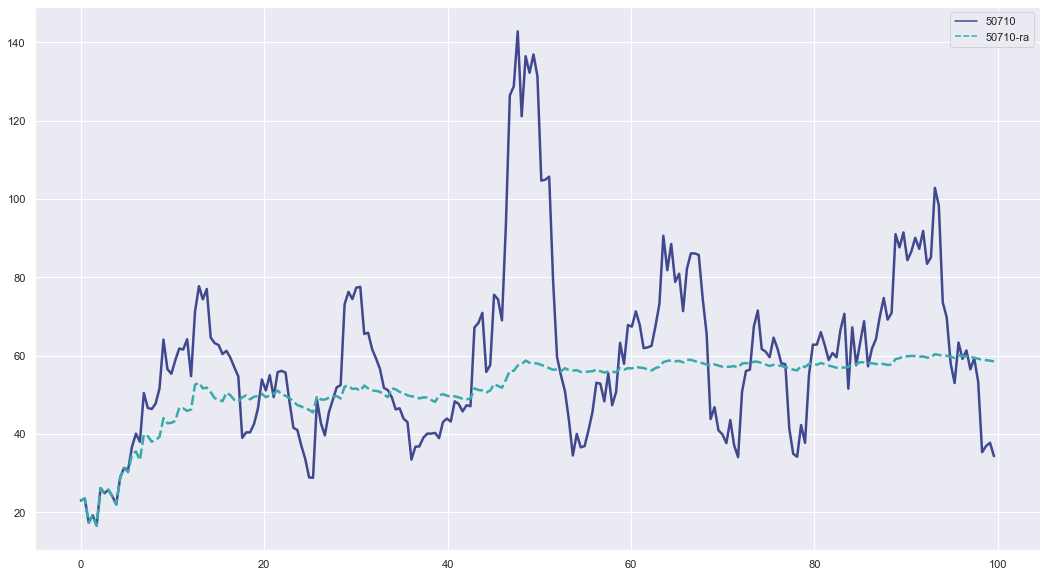

In [113]:
i = 2
fig, ax1 = plt.subplots(figsize=(18,10))
sns.set_theme()
sns.lineplot(data = combined_df.iloc[:, [i, i+4]], sort = False, ax=ax1, palette='mako', lw=2.5)

#ax1.set_ylim([0,250])

<AxesSubplot:>

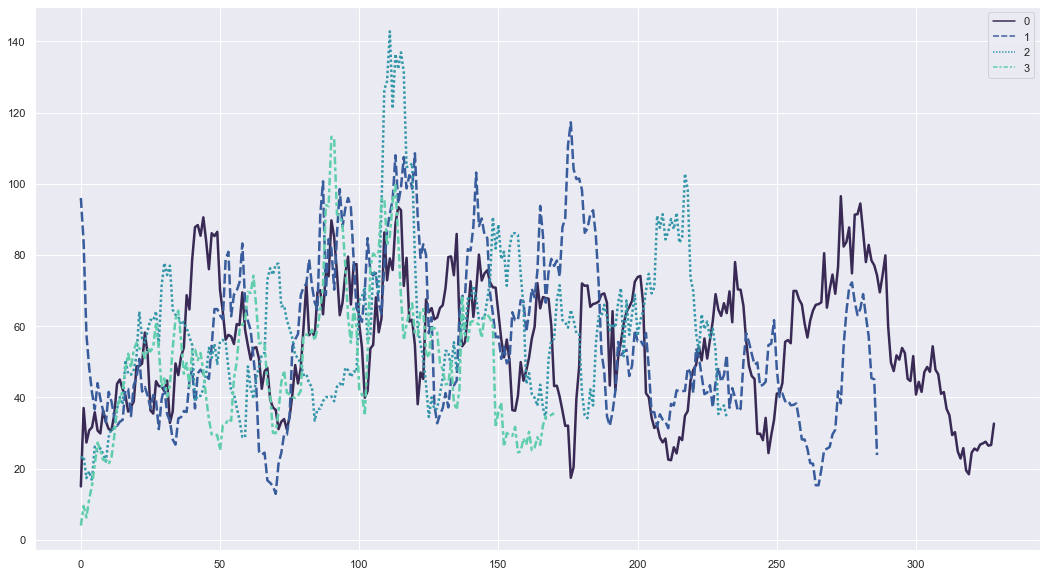

In [54]:
fig, ax1 = plt.subplots(figsize=(18,10))
sns.set_theme()
sns.lineplot(data = [all_recent_form['35320'], all_recent_form['7133'],all_recent_form['50710'], all_recent_form['253802']], sort = False, ax=ax1, palette='mako', lw=2.5)

In [ ]:
combined_df.shape

0
1
2
3


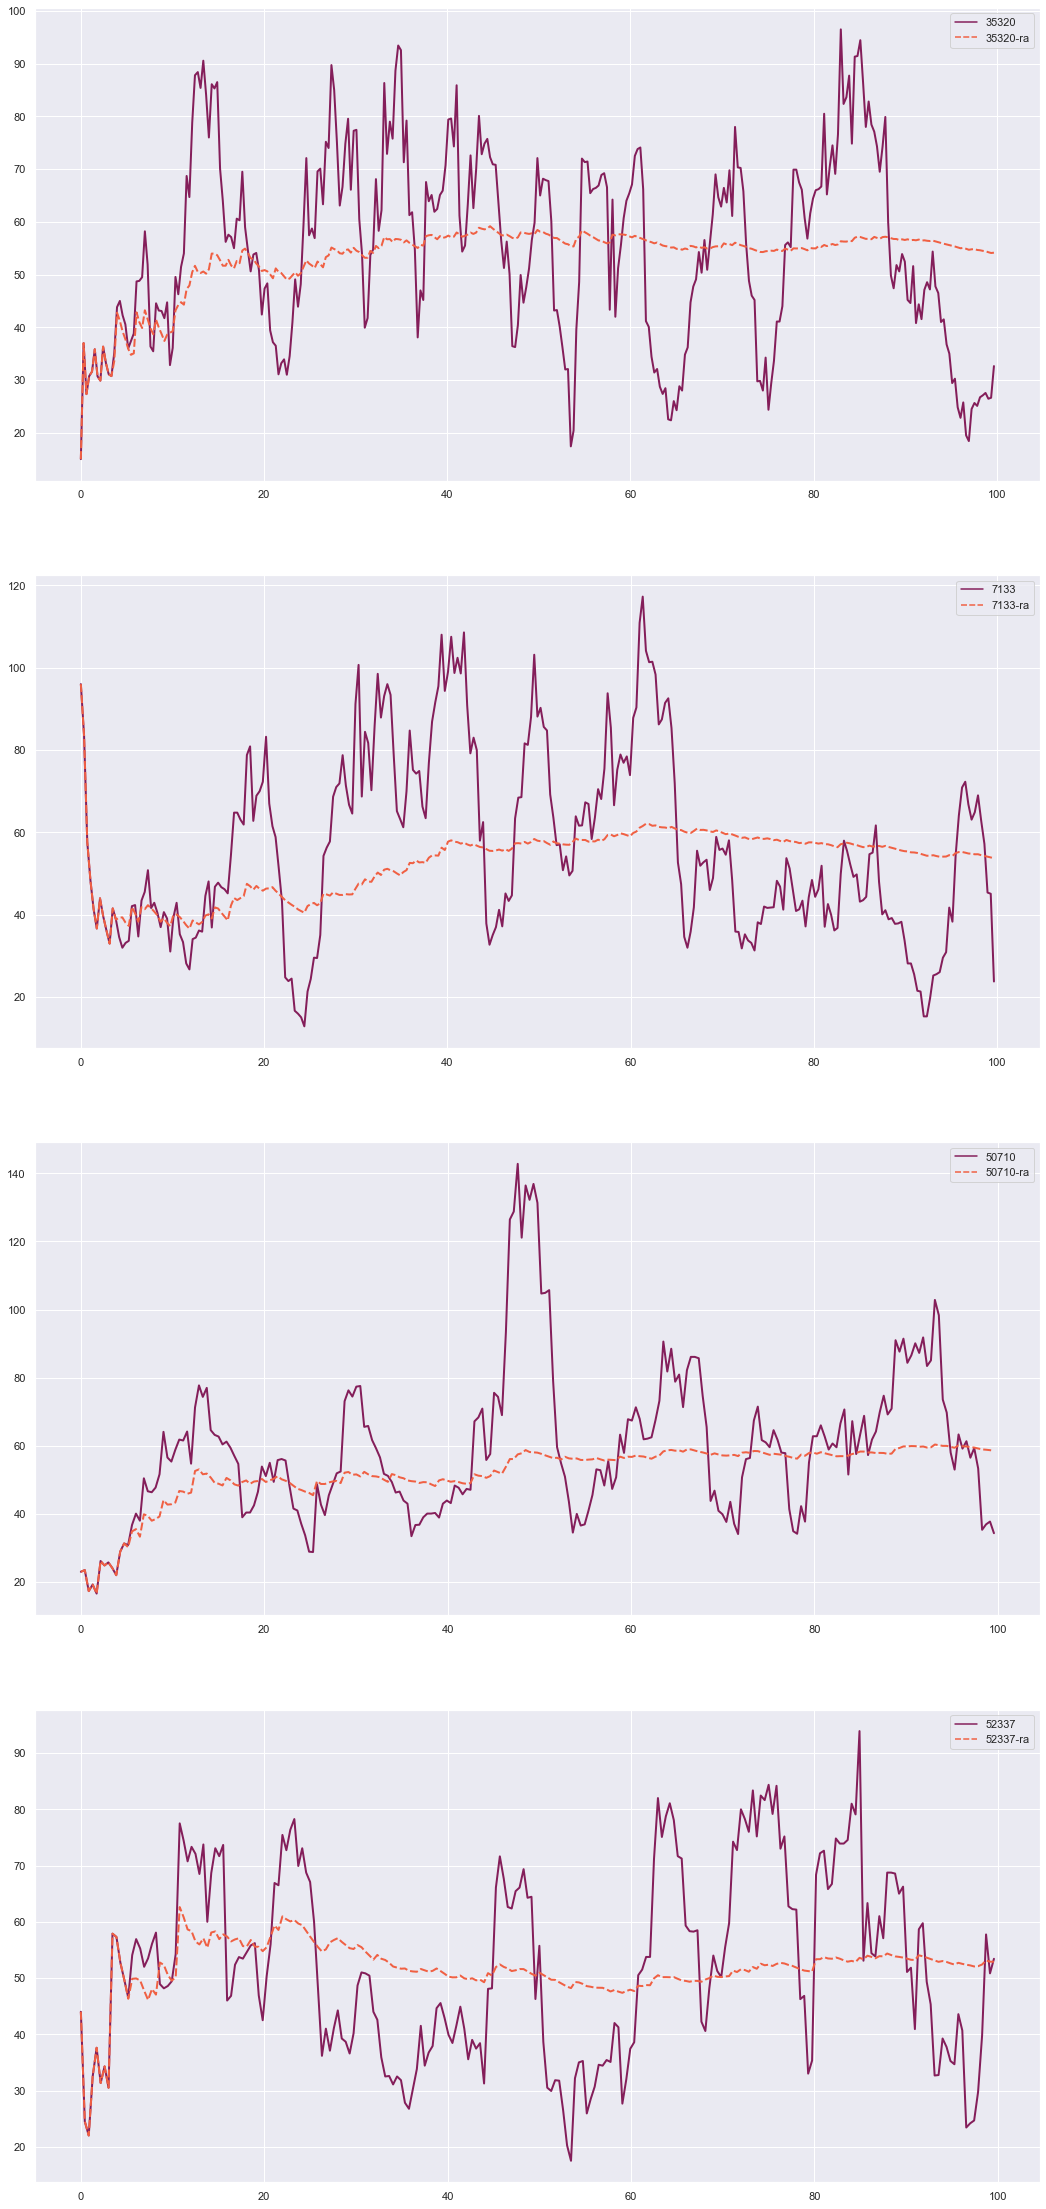

In [120]:
fig, ax1 = plt.subplots(nrows=combined_df.shape[1]//2, figsize=(18, combined_df.shape[1]*5))
sns.set_theme()
for i in range(combined_df.shape[1]//2):
    print(i)
    sns.lineplot(data = combined_df.iloc[:, [i, i+4]], sort = False, ax=ax1[i], palette='rocket', lw=2)

In [51]:
cols = full_df.columns
full_ave_df = full_ave_df.reindex(columns=cols)
cols = {col:f'{col}_rf' for col in cols}
full_df.rename(columns=cols, inplace=True)
full_df.head()


,4188_rf,20413_rf,267192_rf,9014_rf,53241_rf,14022_rf,52946_rf,50710_rf,14225_rf,53211_rf,...,50424_rf,5603_rf,8151_rf,47270_rf,6540_rf,11886_rf,9187_rf,29290_rf,14158_rf,5390_rf
0.00,18.0,64.0,1.0,0.0,35.0,51.0,NaN,23.0,83.0,8.0,...,NaN,13.0,155.0,3.0,4.0,52.0,48.0,31.0,28.0,81.0
0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
full_ave_df.head()

,4188,20413,267192,9014,53241,14022,52946,50710,14225,53211,...,50424,5603,8151,47270,6540,11886,9187,29290,14158,5390
0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.62,NaN,NaN,NaN,NaN,NaN,NaN,40.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.25,NaN,NaN,NaN,NaN,NaN,NaN,43.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.88,NaN,NaN,NaN,NaN,NaN,NaN,47.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.50,NaN,NaN,NaN,NaN,NaN,NaN,35.67,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
full_combined_df = pd.concat([full_df, full_ave_df], axis=1, join='inner')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


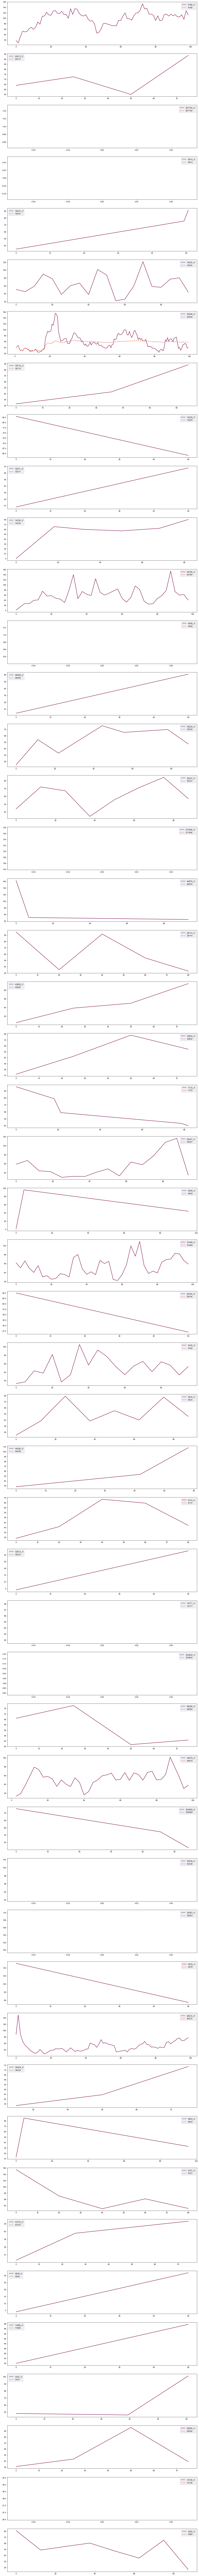

In [55]:
k = full_combined_df.shape[1]//2
fig, ax1 = plt.subplots(nrows=k, figsize=(18, k*5))
sns.set_theme()
for i in range(k):
    print(i)
    sns.lineplot(data = full_combined_df.iloc[:, [i, i+k]], sort = False, ax=ax1[i], palette='rocket', lw=2)